In [78]:
import matplotlib
import matplotlib.pyplot as plt
import requests
import spotipy
import spotipy.util as util
import json
import numpy as np
from collections import defaultdict

CLIENT_ID = '06fdc33f688440e6bff40f6eb930f21c'
CLIENT_SECRET = 'f83c328423054a73a3daa9ae9045e538'
REDIRECT_URI = 'http://localhost/'
SPOTIFY_SCOPE = 'user-library-read playlist-modify-public'
username = 'james.hoke.peacock'

In [2]:
token = util.prompt_for_user_token(username, SPOTIFY_SCOPE, client_id=CLIENT_ID, client_secret=CLIENT_SECRET, redirect_uri=REDIRECT_URI)
sp = spotipy.Spotify(auth=token)
print token



            User authentication requires interaction with your
            web browser. Once you enter your credentials and
            give authorization, you will be redirected to
            a url.  Paste that url you were directed to to
            complete the authorization.

        
Opened https://accounts.spotify.com/authorize?scope=playlist-modify-public+user-library-read&redirect_uri=http%3A%2F%2Flocalhost%2F&response_type=code&client_id=06fdc33f688440e6bff40f6eb930f21c in your browser


Enter the URL you were redirected to: http://localhost/?code=AQBHWmYMca3DbhWMtBC1jjzNfAEt3zJKBRPApwFabbxqpJN56E52GhGurbBRHUA0q21ybXLFGbHWr0wCvn6sibX_m-ifyeD4xwtWL0zsPTL7Jw_PacysugdU1IQJlECohmPfU0Gbz7WSqTILiwdsT0vjmpZJnfqK5Jpse5sdHuClDPUu1TdrG4YRkVVTdwn4xFPNxfzsyO9x7woTNm3cfutcJgenTWj8khQgpgQO9ZNhru0c


BQDTIZV1ZkpPP0SvYIKAg1i8Fi5i78e7W94UySm-DpjWBL9UsFQDNfJTvnNhB-l9sjEYinhtumNOpqbF89qPZV-4KwaDAFUcq28l7m7cUxGsaSJC0bEtaplJyO7_gALklSA-0lI1mbsQKVCt-sJB_UrQfyNn8KTtiycot5Q-Ozk8HaATq9vNOgyJUPJOu9y

In [3]:
# Define a function for a bar plot
def barplot(x_data, y_data, error_data, x_label, y_label, title):

    _, ax = plt.subplots()
    # Draw bars, position them in the center of the tick mark on the x-axis
    ax.bar(x_data, y_data, color = '#539caf', align = 'center')
    # Draw error bars to show standard deviation, set ls to 'none'
    # to remove line between points
    ax.errorbar(x_data, y_data, yerr = error_data, color = '#297083', ls = 'none', lw = 2, capthick = 2)
    ax.set_ylabel(y_label, rotation='horizontal')
    ax.set_xlabel(x_label)
    ax.set_title(title)
    plt.xticks(rotation=45)


In [4]:
def mean_and_std(mat):
    # Assumes summing vertically. Horizontal dimension preserved
    npmat = np.array(mat)
    mean = np.mean(npmat, axis=0)
    std = np.std(npmat, axis=0)
    return mean, std
    

In [5]:
def fetch_and_viz(song_uris, display_songs=False):
    track_features = sp.audio_features(song_uris)
    features = [u'energy', u'liveness', u'tempo', u'speechiness', u'acousticness', u'instrumentalness', u'danceability', u'key', u'valence'] # loudness excluded for now
    song_data = []
    print "Songs Featured"
    for track in track_features:
        if display_songs:
            track_full = sp.track(track['uri'])
            print track_full['name']
        vals = [track[f] for f in features]
        vals[2] = float((vals[2] - 24)) / 204
        vals[7] /= float(13)
        song_data.append(vals)
    mean, std_dev = mean_and_std(song_data)
    barplot(x_data = features
        , y_data = mean
        , error_data = std_dev
        , x_label = 'Features'
        , y_label = 'Values'
        , title = 'Playlist Analysis')
    

In [6]:
def vizualize_playlist(playlist_uri, display_songs=False):
    plid = playlist_uri.split(":")[-1]
    track_results = sp._get("playlists/%s/tracks" % (plid), limit=100, offset=0,market='US')
    all_song_uris = [track[u'track'][u'uri'] for track in track_results['items']]
    fetch_and_viz(all_song_uris, display_songs)
    
def vizualize_song(song_uri):
    fetch_and_viz([song_uri])

Songs Featured


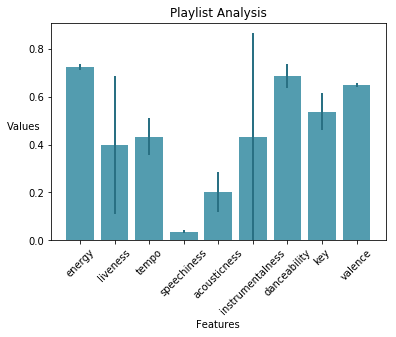

In [7]:
fetch_and_viz(['spotify:track:4BdGO1CaObRD4La9l5Zanz','spotify:track:1ROBixGgXrYlcCcrBfxAoy'])

In [8]:
groove_theory_uri='spotify:user:spotify:playlist:37i9dQZF1DX1tW4VlEfDSS'
rap_caviar_uri = 'spotify:user:spotify:playlist:37i9dQZF1DX0XUsuxWHRQd'
pollen_uri = 'spotify:user:spotify:playlist:37i9dQZF1DWWBHeXOYZf74'
chill_n_bassy_uri = 'spotify:user:james.hoke.peacock:playlist:0Xl3RIy0jPlv3axAB1pMoR'
house_home_uri = 'spotify:user:heathrfeathr:playlist:3xwAMNQ6hHChEkG8469Iy1'
skrt_uri = 'spotify:user:miragefx:playlist:0JQJjjtY4GRaYgX1c8Qeo2'

Songs Featured


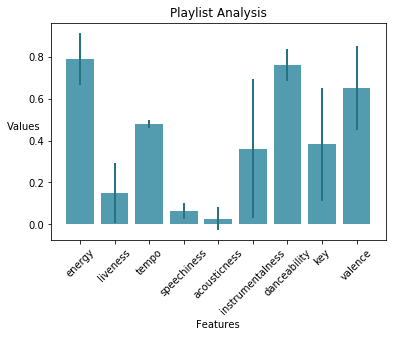

In [76]:
vizualize_playlist(groove_theory_uri, display_songs=False)

In [64]:
## Danceability, tempo & speechiness have narrowest std dev. Energy is next 
# instrumentalness,  liveness and valence have wide std dev for this playlist

Songs Featured


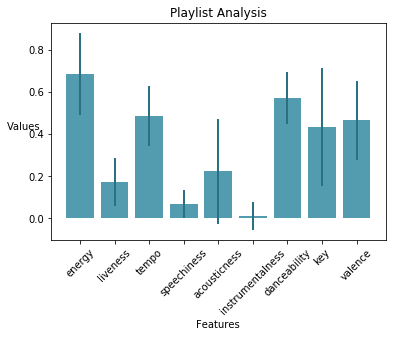

In [75]:
# vizualize_playlist(rap_caviar_uri)
# vizualize_playlist(house_home_uri)
# vizualize_playlist(chill_n_bassy_uri)
# vizualize_playlist(pollen_uri)
vizualize_playlist('spotify:user:mightytreefolk:playlist:0RKqoL574g9rzdd0HZkfLA') # casual groove

In [75]:
#CONCLUSION: NO Playlist is consistent

In [94]:
def hist_values(seq):
    hist = defaultdict(int)
    for i in seq:
        hist[i] += 1

    return hist

def get_genres_from_playlst(playlist_uri, top_n=5):
    plid = playlist_uri.split(":")[-1]
    track_results = sp._get("playlists/%s/tracks" % (plid), limit=100, offset=0,market='US')
    all_artists = [track[u'track'][u'artists'] for track in track_results['items']]
    all_genres = []
    uri_dict = {}
    for artists in all_artists:
        for artist in artists:
            artist_full = sp.artist(artist[u'uri'])
            if artist_full[u'genres']:
                all_genres.extend(artist_full[u'genres'])
    top_genres = sorted(hist_values(all_genres).items(),key=lambda a: a[1], reverse=True)[:top_n]
    for k,v in top_genres:
        print k,v
#     return top_genres

In [97]:
get_genres_from_playlst(house_home_uri, top_n=10)

float house 30
fluxwork 26
outsider house 22
microhouse 18
intelligent dance music 17
art pop 15
electronic 14
escape room 14
experimental pop 14
deep house 14


[(u'float house', 30),
 (u'fluxwork', 26),
 (u'outsider house', 22),
 (u'microhouse', 18),
 (u'intelligent dance music', 17),
 (u'art pop', 15),
 (u'electronic', 14),
 (u'escape room', 14),
 (u'experimental pop', 14),
 (u'deep house', 14)]

In [98]:
get_genres_from_playlst(chill_n_bassy_uri, top_n=10)

vapor twitch 27
vapor soul 21
electronic trap 14
edm 11
electro house 11
alternative r&b 11
tropical house 8
pop edm 8
brostep 7
bass trap 6


[(u'vapor twitch', 27),
 (u'vapor soul', 21),
 (u'electronic trap', 14),
 (u'edm', 11),
 (u'electro house', 11),
 (u'alternative r&b', 11),
 (u'tropical house', 8),
 (u'pop edm', 8),
 (u'brostep', 7),
 (u'bass trap', 6)]

In [99]:
available_genre_seeds = ["acoustic",
    "afrobeat",
    "alt-rock",
    "alternative",
    "ambient",
    "anime",
    "black-metal",
    "bluegrass",
    "blues",
    "bossanova",
    "brazil",
    "breakbeat",
    "british",
    "cantopop",
    "chicago-house",
    "children",
    "chill",
    "classical",
    "club",
    "comedy",
    "country",
    "dance",
    "dancehall",
    "death-metal",
    "deep-house",
    "detroit-techno",
    "disco",
    "disney",
    "drum-and-bass",
    "dub",
    "dubstep",
    "edm",
    "electro",
    "electronic",
    "emo",
    "folk",
    "forro",
    "french",
    "funk",
    "garage",
    "german",
    "gospel",
    "goth",
    "grindcore",
    "groove",
    "grunge",
    "guitar",
    "happy",
    "hard-rock",
    "hardcore",
    "hardstyle",
    "heavy-metal",
    "hip-hop",
    "holidays",
    "honky-tonk",
    "house",
    "idm",
    "indian",
    "indie",
    "indie-pop",
    "industrial",
    "iranian",
    "j-dance",
    "j-idol",
    "j-pop",
    "j-rock",
    "jazz",
    "k-pop",
    "kids",
    "latin",
    "latino",
    "malay",
    "mandopop",
    "metal",
    "metal-misc",
    "metalcore",
    "minimal-techno",
    "movies",
    "mpb",
    "new-age",
    "new-release",
    "opera",
    "pagode",
    "party",
    "philippines-opm",
    "piano",
    "pop",
    "pop-film",
    "post-dubstep",
    "power-pop",
    "progressive-house",
    "psych-rock",
    "punk",
    "punk-rock",
    "r-n-b",
    "rainy-day",
    "reggae",
    "reggaeton",
    "road-trip",
    "rock",
    "rock-n-roll",
    "rockabilly",
    "romance",
    "sad",
    "salsa",
    "samba",
    "sertanejo",
    "show-tunes",
    "singer-songwriter",
    "ska",
    "sleep",
    "songwriter",
    "soul",
    "soundtracks",
    "spanish",
    "study",
    "summer",
    "swedish",
    "synth-pop",
    "tango",
    "techno",
    "trance",
    "trip-hop",
    "turkish",
    "work-out",
    "world-music"]

In [100]:
def do_rec_filtering(seed_artists, seed_genres, seed_tracks, seed_playlist):
    
    sp.recommendations(self, seed_artists, seed_genres,seed_tracks, limit, country, **kwargs)

NameError: name 'self' is not defined